# Lab 4 Part 1: Linear Regression
Jonathan Ting

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read in the auto-mpg.csv dataset using pandas 
df = pd.read_csv('auto-mpg.csv')

# Create the y label vector. It will be the MPG column.
y = df['mpg']
# The features we will be using for regression are the columns:
# Cylinders, Displacement, Horsepower, Weight, Acceleration
# Ignore: Model-year, Origin, Car-name columns
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
# Anywhere you are asked to create a train-test split on the data, you should use:
# Fixed random state throughout and test size=0.2

## Question 1.1

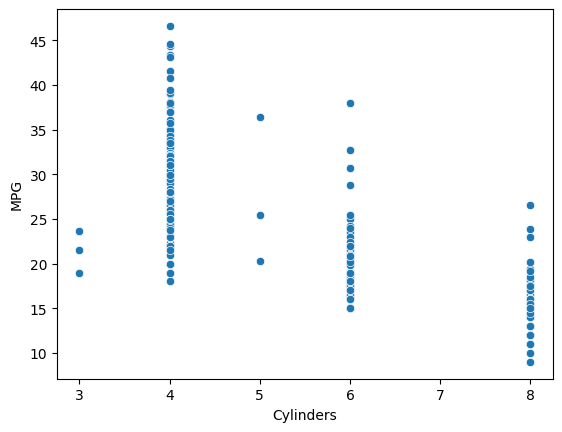

Cylinders
Training MSE: 24.66, Training R2: 0.61
Testing MSE: 21.81, Testing R2: 0.57
Coefficient: -3.65, Intercept: 43.62


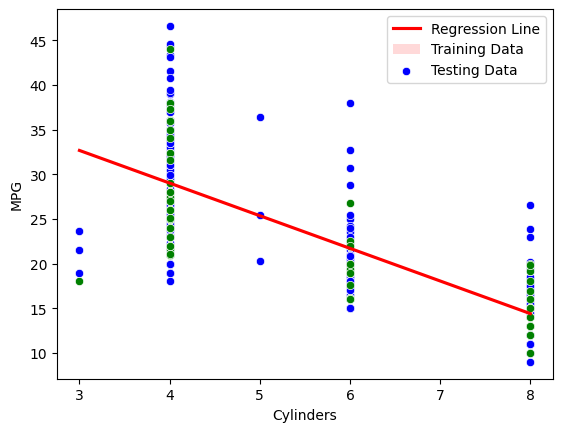

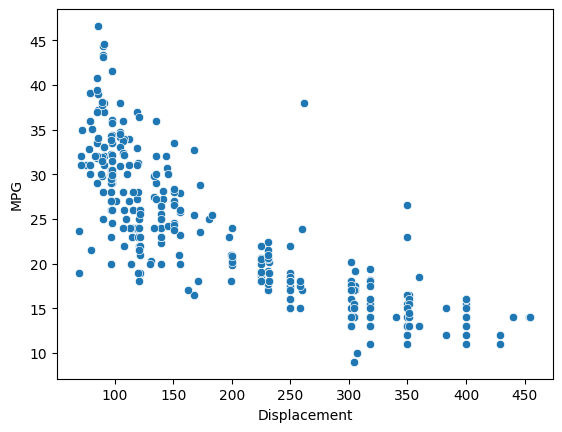

Displacement
Training MSE: 21.54, Training R2: 0.66
Testing MSE: 21.23, Testing R2: 0.58
Coefficient: -0.06, Intercept: 35.77


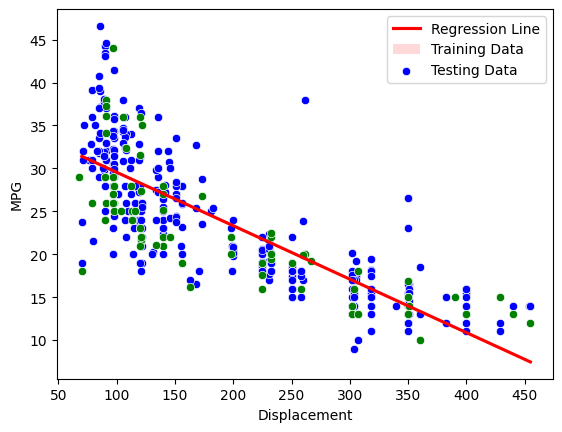

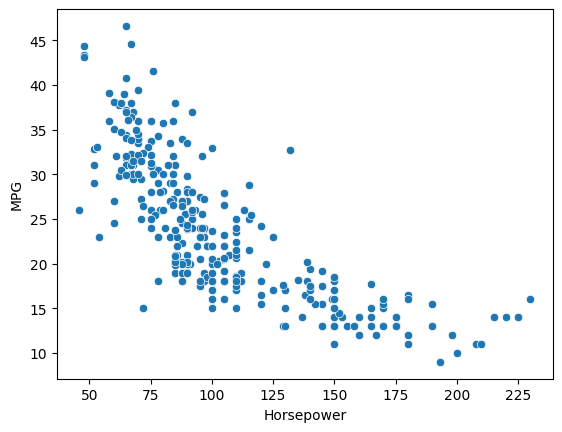

Horsepower
Training MSE: 24.48, Training R2: 0.61
Testing MSE: 22.15, Testing R2: 0.57
Coefficient: -0.16, Intercept: 40.61


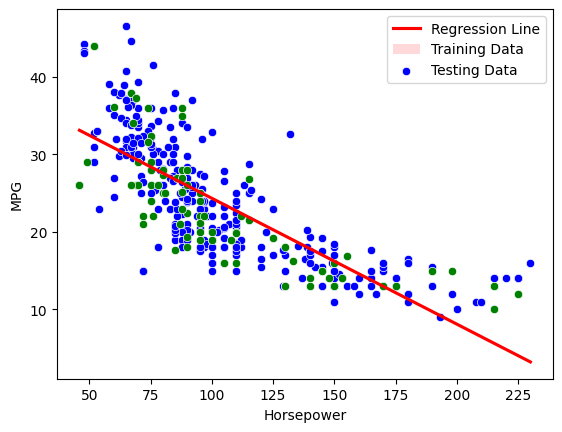

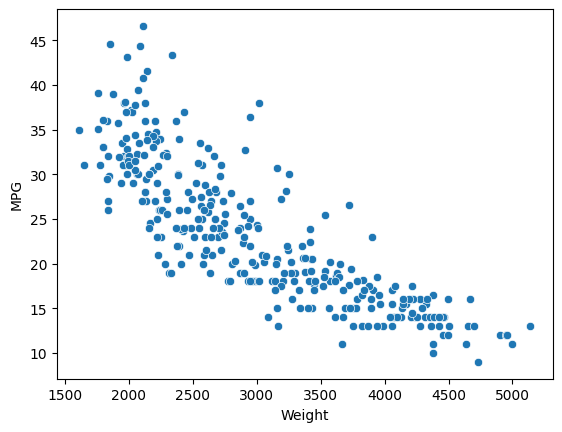

Weight
Training MSE: 19.05, Training R2: 0.70
Testing MSE: 17.69, Testing R2: 0.65
Coefficient: -0.01, Intercept: 47.20


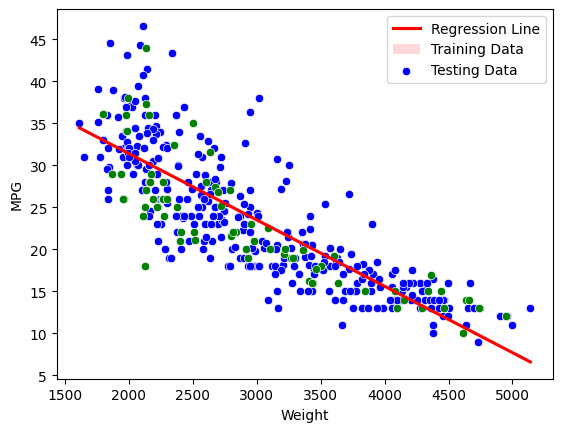

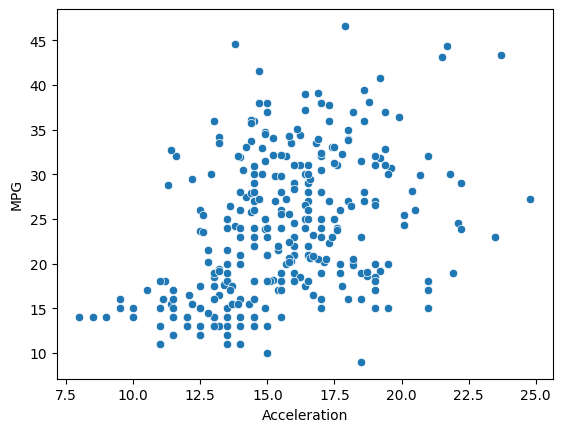

Acceleration
Training MSE: 52.39, Training R2: 0.17
Testing MSE: 40.07, Testing R2: 0.21
Coefficient: 1.16, Intercept: 5.52


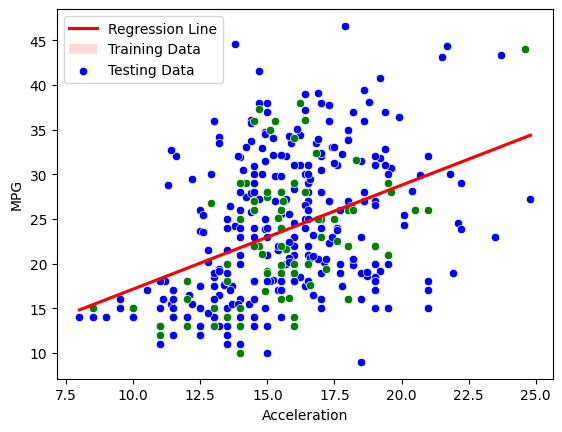

In [97]:
# For each of the five features (cylinders, displacement, horsepower, weight, and acceleration), do the following:
for feature in features:
    # Create an X matrix. Each row is the current feature of interest.
    X = df[feature].values.reshape(-1, 1)
    # Do the train test split as indicated above.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create a plot that shows for the training data: The current feature on the x-axis and the MPG on the y-axis.
    sns.scatterplot(x=X_train.flatten(), y=y_train)
    plt.xlabel(feature.capitalize())
    plt.ylabel('MPG')
    plt.show()
    # Use sklearn’s LinearRegression() to fit to the training data.
    reg = LinearRegression().fit(X_train, y_train)
    # Create a prediction vector based on the training data.
    train_pred = reg.predict(X_train)
    # Calculate and print the mean-squared error and the R2 score using sklearn on the training set.
    # make the precision 2 decimal places
    print(f'{feature.capitalize()}')
    print(f'Training MSE: {np.mean((y_train - train_pred)**2):.2f}, Training R2: {reg.score(X_train, y_train):.2f}')
    # Create a prediction vector based on the testing data.
    test_pred = reg.predict(X_test)
    # Calculate and print the mean-squared error and the R2 score using sklearn on the testing set.
    print(f'Testing MSE: {np.mean((y_test - test_pred)**2):.2f}, Testing R2: {reg.score(X_test, y_test):.2f}')
    # Print the coefficient and intercept parameters from the sklearn model for that feature.
    print(f'Coefficient: {reg.coef_[0]:.2f}, Intercept: {reg.intercept_:.2f}')
    # Plot the line created from that linear regression along with points for the training data (as one color) and the testing data (as another color).
    sns.regplot(x=X_train, y=train_pred, color='red', scatter=False)
    sns.scatterplot(x=X_train.flatten(), y=y_train, color='blue')
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='green')
    # The x-axis should be the feature you’re predicting on
    plt.xlabel(feature.capitalize())
    # The y-axis should be MPG.
    plt.ylabel('MPG')
    # Include a legend to denote which are training and which are testing.
    plt.legend(['Regression Line', 'Training Data', 'Testing Data'])
    plt.show()

## Question 1.2

In [98]:
# Combining all of the data, do the following:
# Create an X matrix that includes all five features.
X = df[features]
# Do the train test split as indicated above.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use sklearn’s LinearRegression() to fit to the training data.
reg = LinearRegression().fit(X_train, y_train)
# Create a prediction vector based on the training data.
train_pred = reg.predict(X_train)
# Calculate and print the mean-squared error and the R2 score using sklearn.
print(f'All Features')
print(f'Training MSE: {np.mean((y_train - train_pred)**2):.2f}, Training R2: {reg.score(X_train, y_train):.2f}')
# Create a prediction vector based on the testing data.
test_pred = reg.predict(X_test)
# Calculate and print the mean-squared error and the R2 score using sklearn.
print(f'Testing MSE: {np.mean((y_test - test_pred)**2):.2f}, Testing R2: {reg.score(X_test, y_test):.2f}')

All Features
Training MSE: 17.88, Training R2: 0.72
Testing MSE: 17.94, Testing R2: 0.65
